 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
ncells <- 1000  # Number of cells

In [2]:
# Our simulation involves three cell types/components.
# Cells are distributed according to a bivariate normal in a 2-D biological subspace. 
# Each cell type has a different x/y center and a different SD.

xmus <- c(0,5,5)
xsds <- c(1,0.1,1)
ymus <- c(5,5,0)
ysds <- c(1,0.1,1)



In [3]:
# Note that the different centers should not lie on the same y=mx line; this represents populations that differ only in library size. 
# Such differences should not be present in normalized data, and will be eliminated by the cosine normalization step.
# The centers above are chosen so as to guarantee good separation between the different components.

#####################################
# Generating data for batch 1, with a given proportion of cells in each component. 

prop1 <- c(0.3,0.5,0.2)
comp1 <- sample(1:3, prob=prop1, size=ncells, replace=TRUE)


In [4]:
# Sampling locations for cells in each component.
set.seed(0)
samples1 <- cbind(rnorm(n=ncells, mean=xmus[comp1],sd=xsds[comp1]),
                  rnorm(n=ncells, mean=ymus[comp1],sd=ysds[comp1]))

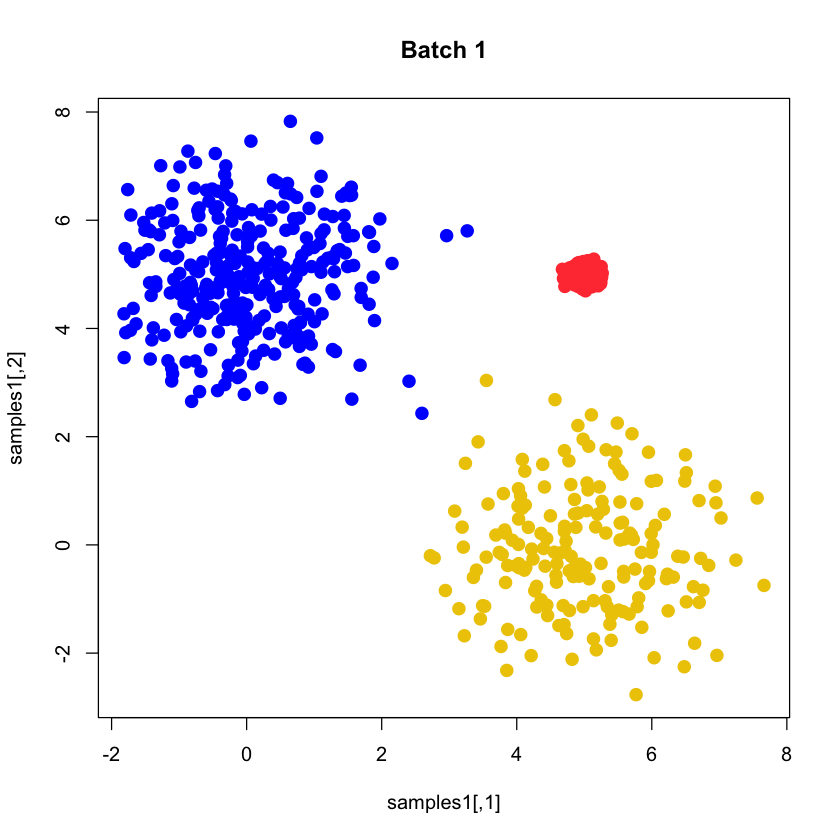

In [5]:
# Plot the true cluster locations for batch 1
ref.cols <- c("blue", "brown1", "gold2")
clust1 <- ref.cols[comp1]
plot(samples1, pch=16, cex=1.5, col=clust1, main=paste0("Batch 1"))

In [6]:
# Random projection to D dimensional space, to mimic high-dimensional expression data.
ngenes <- 100
set.seed(0)
proj <- matrix(rnorm(ngenes*ncells), nrow=ngenes, ncol=2)
A1 <- samples1 %*% t(proj)

In [7]:
# Add normally distributed noise.
A1 <- A1 + rnorm(ngenes*ncells)
rownames(A1) <- paste0("Cell", seq_len(ncells), "-1")
colnames(A1) <- paste0("Gene", seq_len(ngenes))


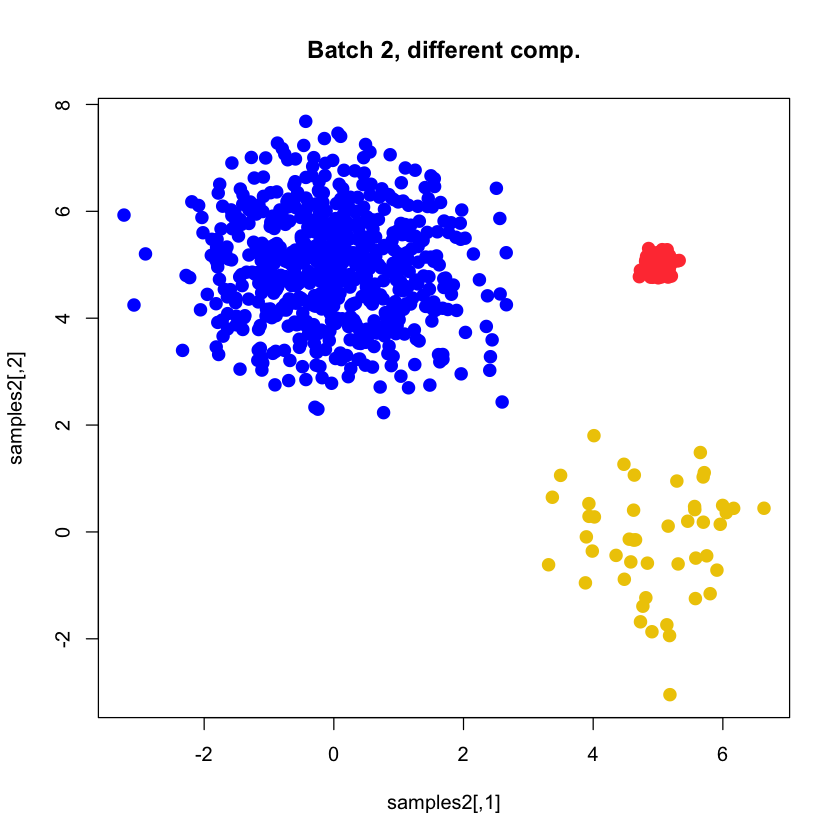

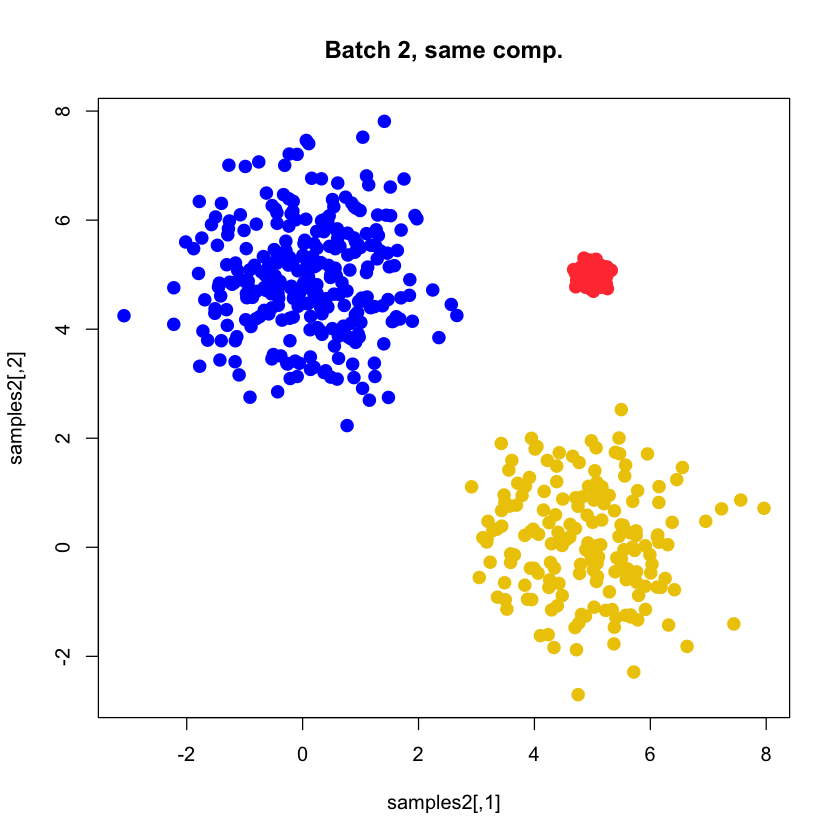

In [8]:
#prop1 <- c(0.3,0.5,0.2)
outmat <- outcol <- list()
for (easy in c(FALSE, TRUE)) { 
    if (easy) { 
        prop2 <- prop1
    } else {
        prop2 <- c(0.65,0.3,0.05)
    }
    
    # Setting proportions of each of the three cell types in batch 2.
    comp2 <- sample(1:3, prob=prop2, size=ncells, replace=TRUE) 

    # Sampling locations for cells in each component.  
    set.seed(0)
    samples2 <- cbind(rnorm(n=ncells, mean=xmus[comp2], sd=xsds[comp2]),
                      rnorm(n=ncells, mean=ymus[comp2], sd=ysds[comp2]))
    
    # Plot the true cluter labels for batch 2.
    clust2 <- ref.cols[comp2]
    plot(samples2, pch=16, cex=1.5, col=clust2, main=paste("Batch 2,", ifelse(easy, "same", "different"), "comp."))
    
    # Random projection, followed by adding batch effects and random noise.
    A2 <- samples2 %*% t(proj) 
    A2 <- A2 + matrix(rep(rnorm(ngenes), each=ncells), ncol=ngenes) # gene-specific batch effect (genes are columns)
    A2 <- A2 + rnorm(ngenes*ncells) # noise
    rownames(A2) <- paste0("Cell", seq_len(ncells), "-2")
    colnames(A2) <- paste0("Gene", seq_len(ngenes))
    
    # Assigning batches and colours.
    if (easy) {
        outmat$ii <- A2
        outcol$ii <- clust2
    } else {
        outmat$i <- A2
        outcol$i <- clust2
    }
}
    


In [9]:

# Saving data objects for later use.

B1 <- t(A1)
B2i <- t(outmat$i)
B2ii <- t(outmat$ii)
clust2i <- t(outcol$i)
clust2ii <- t(outcol$ii)
save(file="Sim.RData", B1, B2i, B2ii, clust1, clust2i, clust2ii)

In [11]:
head(A1)

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,⋯,Gene91,Gene92,Gene93,Gene94,Gene95,Gene96,Gene97,Gene98,Gene99,Gene100
Cell1-1,7.227857,-3.463530,-0.6030787,0.16937218,-5.501812,1.9005742,-7.047798,8.975509,-2.7926080,11.024454,⋯,1.0994999,0.7053758,9.402719,-4.541080,5.387297,9.347874,-5.268738,0.8083458,-1.4822504,-1.0417857
Cell2-1,5.000544,-4.913888,-3.3484304,0.06798259,-8.604764,5.0240185,-8.419242,11.894028,-3.1719553,11.056147,⋯,0.8958249,1.0016155,14.718164,-4.356438,4.720965,10.549676,-6.817363,-0.2638006,-3.0984784,-2.5079295
Cell3-1,11.070464,-4.908090,3.9137012,7.30282965,-4.936203,-5.5154904,-11.185762,7.289928,0.2236649,20.137886,⋯,7.1452518,-3.7917201,12.030052,-7.320273,6.494738,10.270484,-7.332174,8.6718791,-1.5048742,5.7791638
Cell4-1,4.058343,-2.854554,2.4666148,0.59113540,-4.120251,0.9709673,-6.269478,3.460837,-2.1690406,8.356575,⋯,1.9646851,-1.4311663,7.410043,-3.024173,4.158679,5.450288,-4.009173,3.2464904,-1.5864788,-0.5404694
Cell5-1,3.683954,-1.999139,-1.5617721,0.60844776,-3.391182,-0.3743104,-4.728783,6.498707,-2.7975426,7.301806,⋯,-0.4963955,0.6178083,8.351288,-3.894802,2.942193,4.651639,-4.134288,0.6739130,-0.4258182,-2.3166866
Cell6-1,10.288895,-7.519675,2.7510472,6.31636253,-2.568051,-4.8801966,-9.370611,8.050665,-2.7918173,22.467708,⋯,8.2292407,-3.9278848,9.126619,-7.841079,6.228092,10.568656,-4.719115,6.0466747,-0.1233329,2.1578662
